# Student Performance Prediction using Machine Learning

## Introduction

Understanding the factors that influence student academic performance is a crucial step toward improving learning outcomes and guiding educational decisions.  
In this project, we explore the *Student Performance* dataset — which contains demographic, social, and academic information about students — to analyze which features most strongly impact their final grade (**G3**).

By leveraging **machine learning regression techniques**, we aim to uncover meaningful insights about student behavior, study patterns, and parental influence, while also developing a **predictive model** capable of estimating a student’s final grade based on these characteristics.

This notebook walks through a complete end-to-end data science workflow — including **data exploration**, **feature preprocessing**, **model comparison**, and **performance evaluation** — ultimately leading to the deployment of an **interactive Dash web application** that predicts student grades in real time.

---

## Objective

The main goal of this project is to **build a robust predictive model** that accurately estimates the **final grade (G3)** of students based on their personal, social, and academic features.

Specifically, the project aims to:

- **Explore and analyze** key patterns and correlations within the dataset.  
- **Preprocess and encode** categorical and numerical variables for machine learning models.  
- **Train and evaluate** multiple regression algorithms (Linear Regression, Lasso, K-Nearest Neighbors, Decision Tree, and Random Forest).  
- **Compare model performance** using the coefficient of determination (**R²**) to identify the best-performing model.  
- **Select and deploy** the most effective model (Lasso Regression) in a **Dash web application** for real-time student grade prediction.  

---

## Dataset Overview

The dataset contains information on students’ demographic and academic attributes such as:

- Parental education levels (`Medu`, `Fedu`)  
- Study and travel times (`studytime`, `traveltime`)  
- Family and social relationships (`famrel`, `goout`, `romantic`)  
- Academic performance indicators (`G1`, `G2`, `failures`)  
- Lifestyle factors (`Dalc`, `Walc`, `health`, `absences`)

Together, these features form the foundation for modeling the student’s academic success, providing a balanced mix of **academic**, **behavioral**, and **social** predictors.

---

## Methodology Overview

1. **Data Exploration:** Investigate distributions, correlations, and missing values.  
2. **Data Preprocessing:** Encode categorical variables, check outliers, and split data .  
3. **Feature Engineering:** Map categorical values to descriptive labels and prepare the final dataset for modeling.  
4. **Model Training:** Train multiple regression models and tune hyperparameters for performance optimization.  
5. **Model Evaluation:** Compare models using **R²**, **MAE**, **MSE** to determine which best predicts student grades.  
6. **Deployment:** Integrate the best-performing model (Lasso Regression) into a **Dash web interface** for interactive predictions.

## Developed by  
**Mohamed Salah Ibrahim – Data Scientist & AI Engineer**  
📋 **Portfolio & Profiles:**  
- [LinkedIn](http://www.linkedin.com/in/mohamedsalahibrahim)
- [GitHub](https://github.com/MSalahnaguib)
- [Kaggle](https://www.kaggle.com/mohamedsalahibrahim)  
- [Email](mailto:mohamedsalahnaguibb@gmail.com)

---

> *This project combines exploratory data analysis, machine learning, and application deployment to demonstrate the complete lifecycle of a data-driven educational prediction system.*


# Imports

In [1]:
!pip install -q --upgrade scikit-learn imbalanced-learn
!pip install -q dash dash-bootstrap-components
!pip install jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 11.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 8.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from scipy import stats
from collections import Counter
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

import os, joblib, pickle, re
from dash import Dash, dcc, html, Input, Output, State
import dash_bootstrap_components as dbc
from jupyter_dash import JupyterDash

warnings.filterwarnings("ignore", category=FutureWarning)

# Data Exploration

In [1]:
from ucimlrepo import fetch_ucirepo

In [2]:
dataset = fetch_ucirepo(id=320)
df = dataset.data.original

In [4]:
df.shape

(649, 33)

In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
num_cols = df.select_dtypes(include='int64').columns
cat_cols = df.select_dtypes(include='object').columns

In [9]:
df[cat_cols]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no


In [10]:
df[num_cols]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10


In [13]:
df['Medu'].value_counts()

Medu
2    186
4    175
1    143
3    139
0      6
Name: count, dtype: int64

In [14]:
df['traveltime'].value_counts()

traveltime
1    366
2    213
3     54
4     16
Name: count, dtype: int64

In [15]:
df['studytime'].value_counts()

studytime
2    305
1    212
3     97
4     35
Name: count, dtype: int64

In [16]:
df['famrel'].value_counts()

famrel
4    317
5    180
3    101
2     29
1     22
Name: count, dtype: int64

## Categorical Variable Mapping (for Better Data Exploration)

It improves **data interpretability**, **visualization clarity**, and makes results more meaningful

In [11]:
edu_map = {
    0: "none",
    1: "primary (4th grade)",
    2: "5th to 9th grade",
    3: "secondary",
    4: "higher education"
}

traveltime_map = {
    1: "<15 min",
    2: "15–30 min",
    3: "30 min–1 hour",
    4: ">1 hour"
}

studytime_map = {
    1: "<2 hours",
    2: "2–5 hours",
    3: "5–10 hours",
    4: ">10 hours"
}

school_map = {
    'GP': 'Gabriel Pereira',
    'MS': 'Mousinho da Silveira'
}

address_map = {
    'U': 'urban',
    'R': 'rural'
}

famsize_map = {
    'GT3': 'greater than 3',
    'LE3': 'less or equal to 3'
}

Pstatus_map = {'T': 'living together',
               'A': 'apart'
}


df["Medu"] = df["Medu"].map(edu_map)
df["Fedu"] = df["Fedu"].map(edu_map)
df["traveltime"] = df["traveltime"].map(traveltime_map)
df["studytime"] = df["studytime"].map(studytime_map)

df['school'] = df['school'].map(school_map)
df['address'] = df['address'].map(address_map)
df['famsize'] = df['famsize'].map(famsize_map)
df['Pstatus'] = df['Pstatus'].map(Pstatus_map)

In [12]:
num_cols = df.select_dtypes(include='int64').columns
cat_cols = df.select_dtypes(include='object').columns

In [13]:
df[num_cols]

,age,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,0,4,3,4,1,1,3,4,0,11,11
1,17,0,5,3,3,1,1,3,2,9,11,11
2,15,0,4,3,2,2,3,3,6,12,13,12
3,15,0,3,2,2,1,1,5,0,14,14,14
4,16,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,1,5,4,2,1,2,5,4,10,11,10
645,18,0,4,3,4,1,1,1,4,15,15,16
646,18,0,1,1,1,1,1,5,6,11,12,9
647,17,0,2,4,5,3,4,2,6,10,10,10


In [14]:
df[cat_cols]

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,Gabriel Pereira,F,urban,greater than 3,apart,higher education,higher education,at_home,teacher,course,...,15–30 min,2–5 hours,yes,no,no,no,yes,yes,no,no
1,Gabriel Pereira,F,urban,greater than 3,living together,primary (4th grade),primary (4th grade),at_home,other,course,...,<15 min,2–5 hours,no,yes,no,no,no,yes,yes,no
2,Gabriel Pereira,F,urban,less or equal to 3,living together,primary (4th grade),primary (4th grade),at_home,other,other,...,<15 min,2–5 hours,yes,no,no,no,yes,yes,yes,no
3,Gabriel Pereira,F,urban,greater than 3,living together,higher education,5th to 9th grade,health,services,home,...,<15 min,5–10 hours,no,yes,no,yes,yes,yes,yes,yes
4,Gabriel Pereira,F,urban,greater than 3,living together,secondary,secondary,other,other,home,...,<15 min,2–5 hours,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,Mousinho da Silveira,F,rural,greater than 3,living together,5th to 9th grade,secondary,services,other,course,...,<15 min,5–10 hours,no,no,no,yes,no,yes,yes,no
645,Mousinho da Silveira,F,urban,less or equal to 3,living together,secondary,primary (4th grade),teacher,services,course,...,<15 min,2–5 hours,no,yes,no,no,yes,yes,yes,no
646,Mousinho da Silveira,F,urban,greater than 3,living together,primary (4th grade),primary (4th grade),other,other,course,...,15–30 min,2–5 hours,no,no,no,yes,yes,yes,no,no
647,Mousinho da Silveira,M,urban,less or equal to 3,living together,secondary,primary (4th grade),services,services,course,...,15–30 min,<2 hours,no,no,no,no,no,yes,yes,no


## Explain of some of columns

- **reason: reason to choose this school**
- **schoolsup: extra educational support**
- **famsup: family educational support**
- **paid: extra paid classes within the course subject (Math or Portuguese)**
- **activities: extra-curricular activities**
- **nursery: attended nursery school**
- **higher: wants to take higher education**
- **internet: Internet access at home**
- **romantic: with a romantic relationship**
- **famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)**
- **freetime: free time after school (numeric: from 1 - very low to 5 - very high)**
- **goout: going out with friends (numeric: from 1 - very low to 5 - very high)**
- **Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)**
- **Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)**
- **health: current health status (numeric: from 1 - very bad to 5 - very good)**
- **absences: number of school absences (numeric: from 0 to 93)**

# Anaylsis

## Univariate analysis

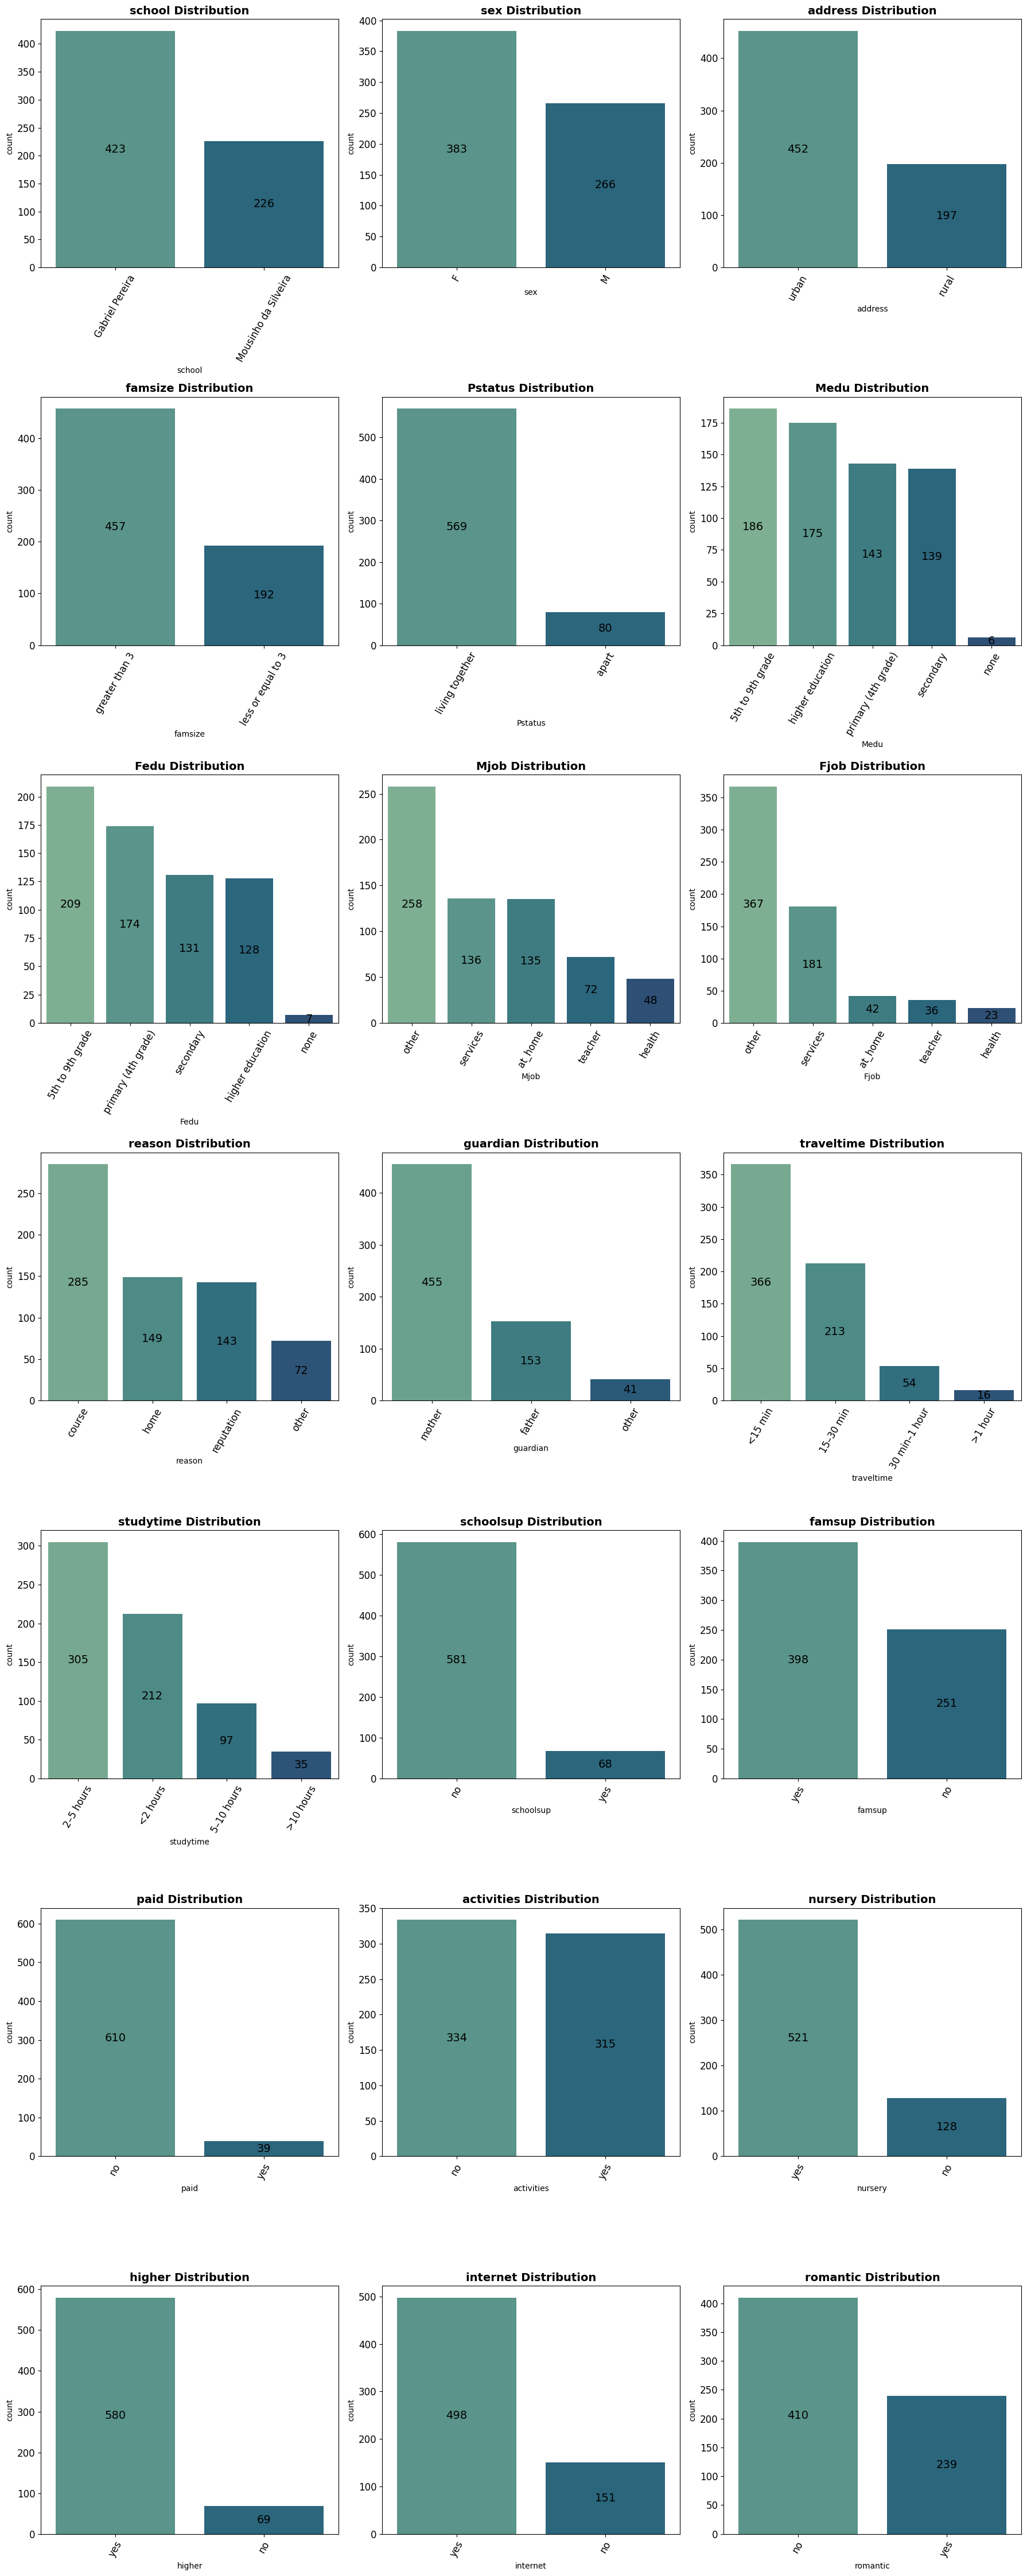

In [21]:
rows, cols = 7, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 45))
axes = axes.flatten()

# Plot each categorical column
for i, col_name in enumerate(cat_cols):
    ax = axes[i]
    plot = sns.countplot(data=df,
                         x=df[col_name],
                         ax=ax,
                         palette="crest",
                         order = df[col_name].value_counts().index
    )

    # Set titles and font sizes
    ax.set_title(f"{col_name} Distribution", fontsize=14, fontweight='bold')
    ax.tick_params(axis="x", rotation=60, labelsize=12)
    ax.tick_params(axis="y", labelsize=12)

    # Add frequency labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='center', fontsize=14)

# Remove unused axes if cat_cols < rows*cols
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


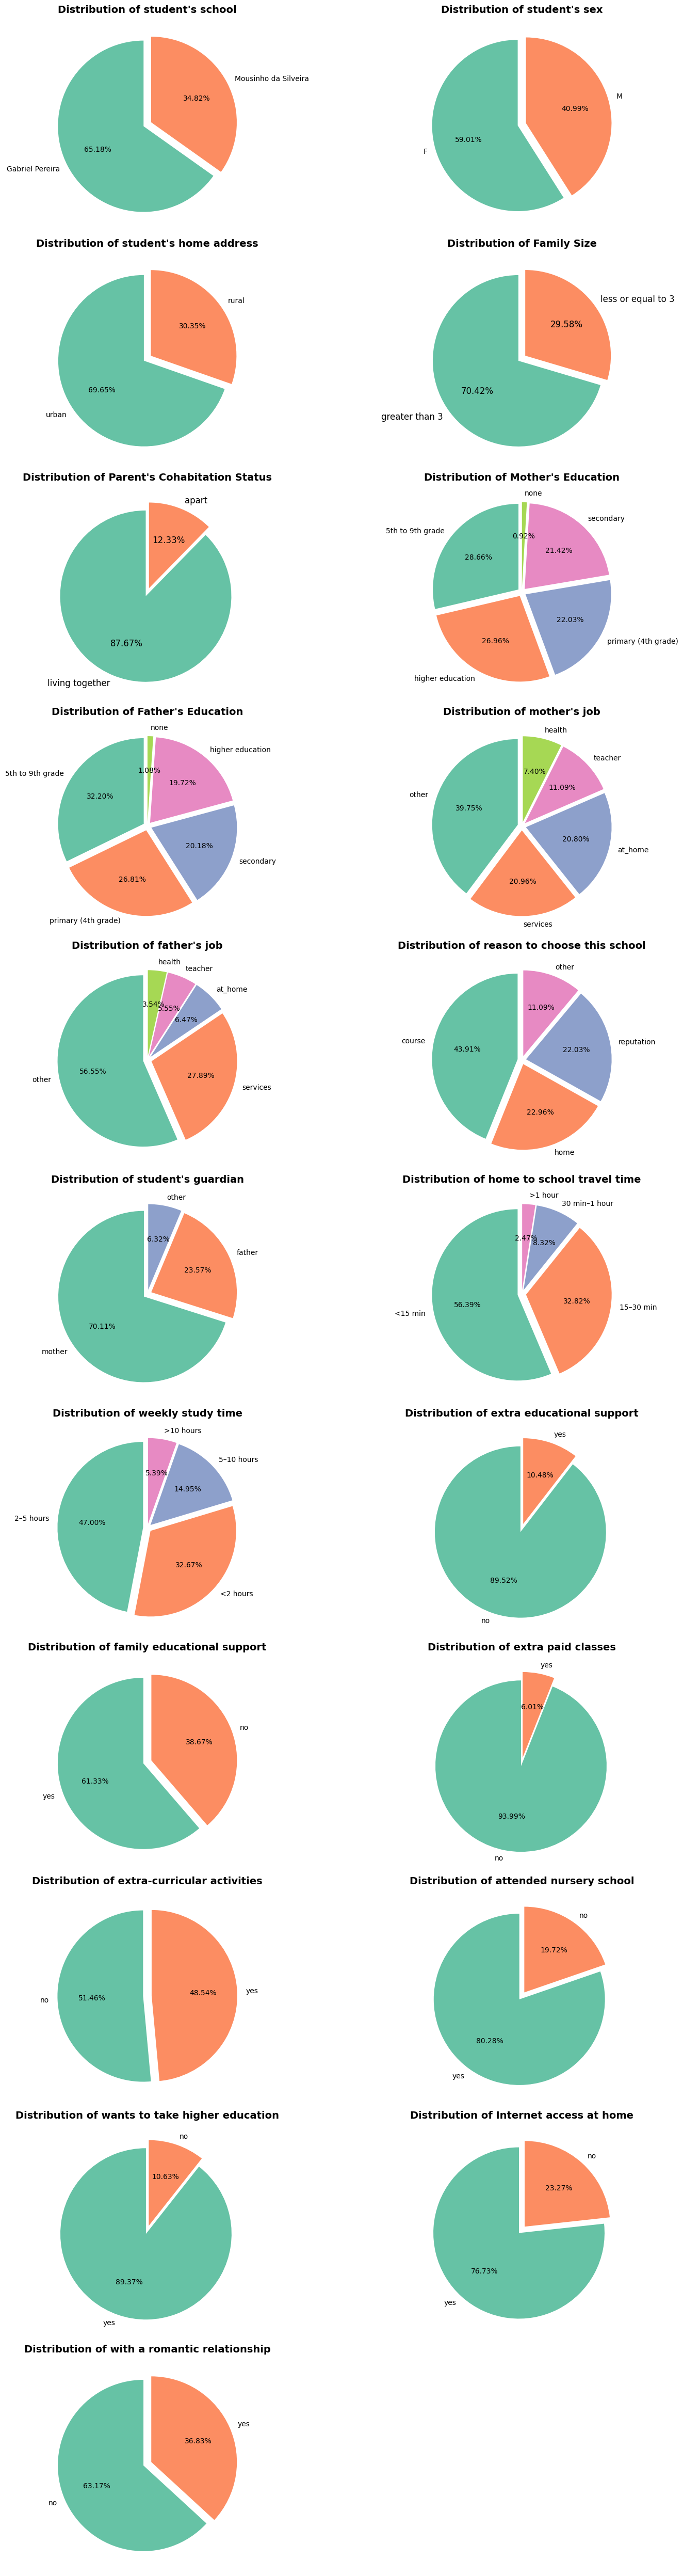

In [22]:
# Prepare the data
school = df['school'].value_counts()
sex = df['sex'].value_counts()
address = df['address'].value_counts()
famsize = df['famsize'].value_counts()
Pstatus = df['Pstatus'].value_counts()
Medu = df['Medu'].value_counts()
Fedu = df['Fedu'].value_counts()
Mjob = df['Mjob'].value_counts()
Fjob = df['Fjob'].value_counts()
reason = df['reason'].value_counts()
guardian = df['guardian'].value_counts()
traveltime = df['traveltime'].value_counts()
studytime = df['studytime'].value_counts()
schoolsup = df['schoolsup'].value_counts()
famsup = df['famsup'].value_counts()
paid = df['paid'].value_counts()
activities = df['activities'].value_counts()
nursery = df['nursery'].value_counts()
higher = df['higher'].value_counts()
internet = df['internet'].value_counts()
romantic = df['romantic'].value_counts()


fig, axes = plt.subplots(11, 2, figsize=(16, 50))

colors = sns.color_palette('Set2')

# --- Plot 1: student's school ---
axes[0, 0].pie(
    school,
    labels=school.index,
    autopct="%1.2f%%",
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(school)
)
axes[0, 0].set_title("Distribution of student's school", fontsize=14, fontweight='bold')


# --- Plot 2: student's sex ---
axes[0, 1].pie(
    sex,
    labels=sex.index,
    autopct="%1.2f%%",
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(sex)
)
axes[0, 1].set_title("Distribution of student's sex", fontsize=14, fontweight='bold')


# --- Plot 3: student's home address ---
axes[1, 0].pie(
    address,
    labels=address.index,
    autopct="%1.2f%%",
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(address)
)
axes[1, 0].set_title("Distribution of student's home address", fontsize=14, fontweight='bold')


# --- Plot 4 : Family Size ---
axes[1, 1].pie(
    famsize,
    labels=famsize.index,
    autopct="%1.2f%%",
    startangle=90,
    colors=colors,
    textprops={'fontsize':12},
    explode=[0.05, 0.05]
)
axes[1, 1].set_title("Distribution of Family Size", fontsize=14, fontweight='bold')


# --- Plot 5: Parent's Cohabitation Status ---
axes[2, 0].pie(
    Pstatus,
    labels=Pstatus.index,
    autopct="%1.2f%%",
    startangle=90,
    colors=colors,
    textprops={'fontsize':12},
    explode=[0.05, 0.05]
)
axes[2, 0].set_title("Distribution of Parent's Cohabitation Status", fontsize=14, fontweight='bold')


# --- Plot 6: Mother's Education ---
axes[2, 1].pie(
    Medu,
    labels=Medu.index,
    autopct="%1.2f%%",
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(Medu)
)
axes[2, 1].set_title("Distribution of Mother's Education", fontsize=14, fontweight='bold')


# --- Plot 7: Father's Education ---
axes[3, 0].pie(
    Fedu,
    labels=Fedu.index,
    autopct="%1.2f%%",
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(Fedu)
)
axes[3, 0].set_title("Distribution of Father's Education", fontsize=14, fontweight='bold')


# --- Plot 8: mother's job ---
axes[3, 1].pie(
    Mjob,
    labels=Mjob.index,
    autopct="%1.2f%%",
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(Mjob)
)
axes[3, 1].set_title("Distribution of mother's job", fontsize=14, fontweight='bold')


# --- Plot 9: father's job ---
axes[4, 0].pie(
    Fjob,
    labels=Fjob.index,
    autopct="%1.2f%%",
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(Fjob)
)
axes[4, 0].set_title("Distribution of father's job", fontsize=14, fontweight='bold')


# --- Plot 10 : reason to choose this school ---
axes[4, 1].pie(
    reason,
    labels=reason.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(reason)
)
axes[4, 1].set_title('Distribution of reason to choose this school', fontsize=14, fontweight='bold')


# --- Plot 11 : student's guardian ---
axes[5, 0].pie(
    guardian,
    labels=guardian.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(guardian)
)
axes[5, 0].set_title("Distribution of student's guardian", fontsize=14, fontweight='bold')


# --- Plot 12 : home to school travel time ---
axes[5, 1].pie(
    traveltime,
    labels=traveltime.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(traveltime)
)
axes[5, 1].set_title('Distribution of home to school travel time', fontsize=14, fontweight='bold')


# --- Plot 13 : weekly study time ---
axes[6, 0].pie(
    studytime,
    labels=studytime.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(studytime)
)
axes[6, 0].set_title('Distribution of weekly study time', fontsize=14, fontweight='bold')


# --- Plot 14 : extra educational support ---
axes[6, 1].pie(
    schoolsup,
    labels=schoolsup.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(schoolsup)
)
axes[6, 1].set_title('Distribution of extra educational support', fontsize=14, fontweight='bold')


# --- Plot 15 : family educational support ---
axes[7, 0].pie(
    famsup,
    labels=famsup.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(famsup)
)
axes[7, 0].set_title('Distribution of family educational support', fontsize=14, fontweight='bold')


# --- Plot 16 : extra paid classes within the course subject ---
axes[7, 1].pie(
    paid,
    labels=paid.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(paid)
)
axes[7, 1].set_title('Distribution of extra paid classes', fontsize=14, fontweight='bold')


# --- Plot 17 : extra-curricular activities ---
axes[8, 0].pie(
    activities,
    labels=activities.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(activities)
)
axes[8, 0].set_title('Distribution of extra-curricular activities', fontsize=14, fontweight='bold')


# --- Plot 18 : attended nursery school ---
axes[8, 1].pie(
    nursery,
    labels=nursery.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(nursery)
)
axes[8, 1].set_title('Distribution of attended nursery school', fontsize=14, fontweight='bold')


# --- Plot 19 : wants to take higher education ---
axes[9, 0].pie(
    higher,
    labels=higher.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(higher)
)
axes[9, 0].set_title('Distribution of wants to take higher education', fontsize=14, fontweight='bold')


# --- Plot 20 : Internet access at home ---
axes[9, 1].pie(
    internet,
    labels=internet.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(internet)
)
axes[9, 1].set_title('Distribution of Internet access at home', fontsize=14, fontweight='bold')


# --- Plot 21 : with a romantic relationship ---
axes[10, 0].pie(
    romantic,
    labels=romantic.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':10},
    explode=[0.05]*len(romantic)
)
axes[10, 0].set_title('Distribution of with a romantic relationship', fontsize=14, fontweight='bold')
fig.delaxes(axes[10, 1])

plt.tight_layout()
plt.show()


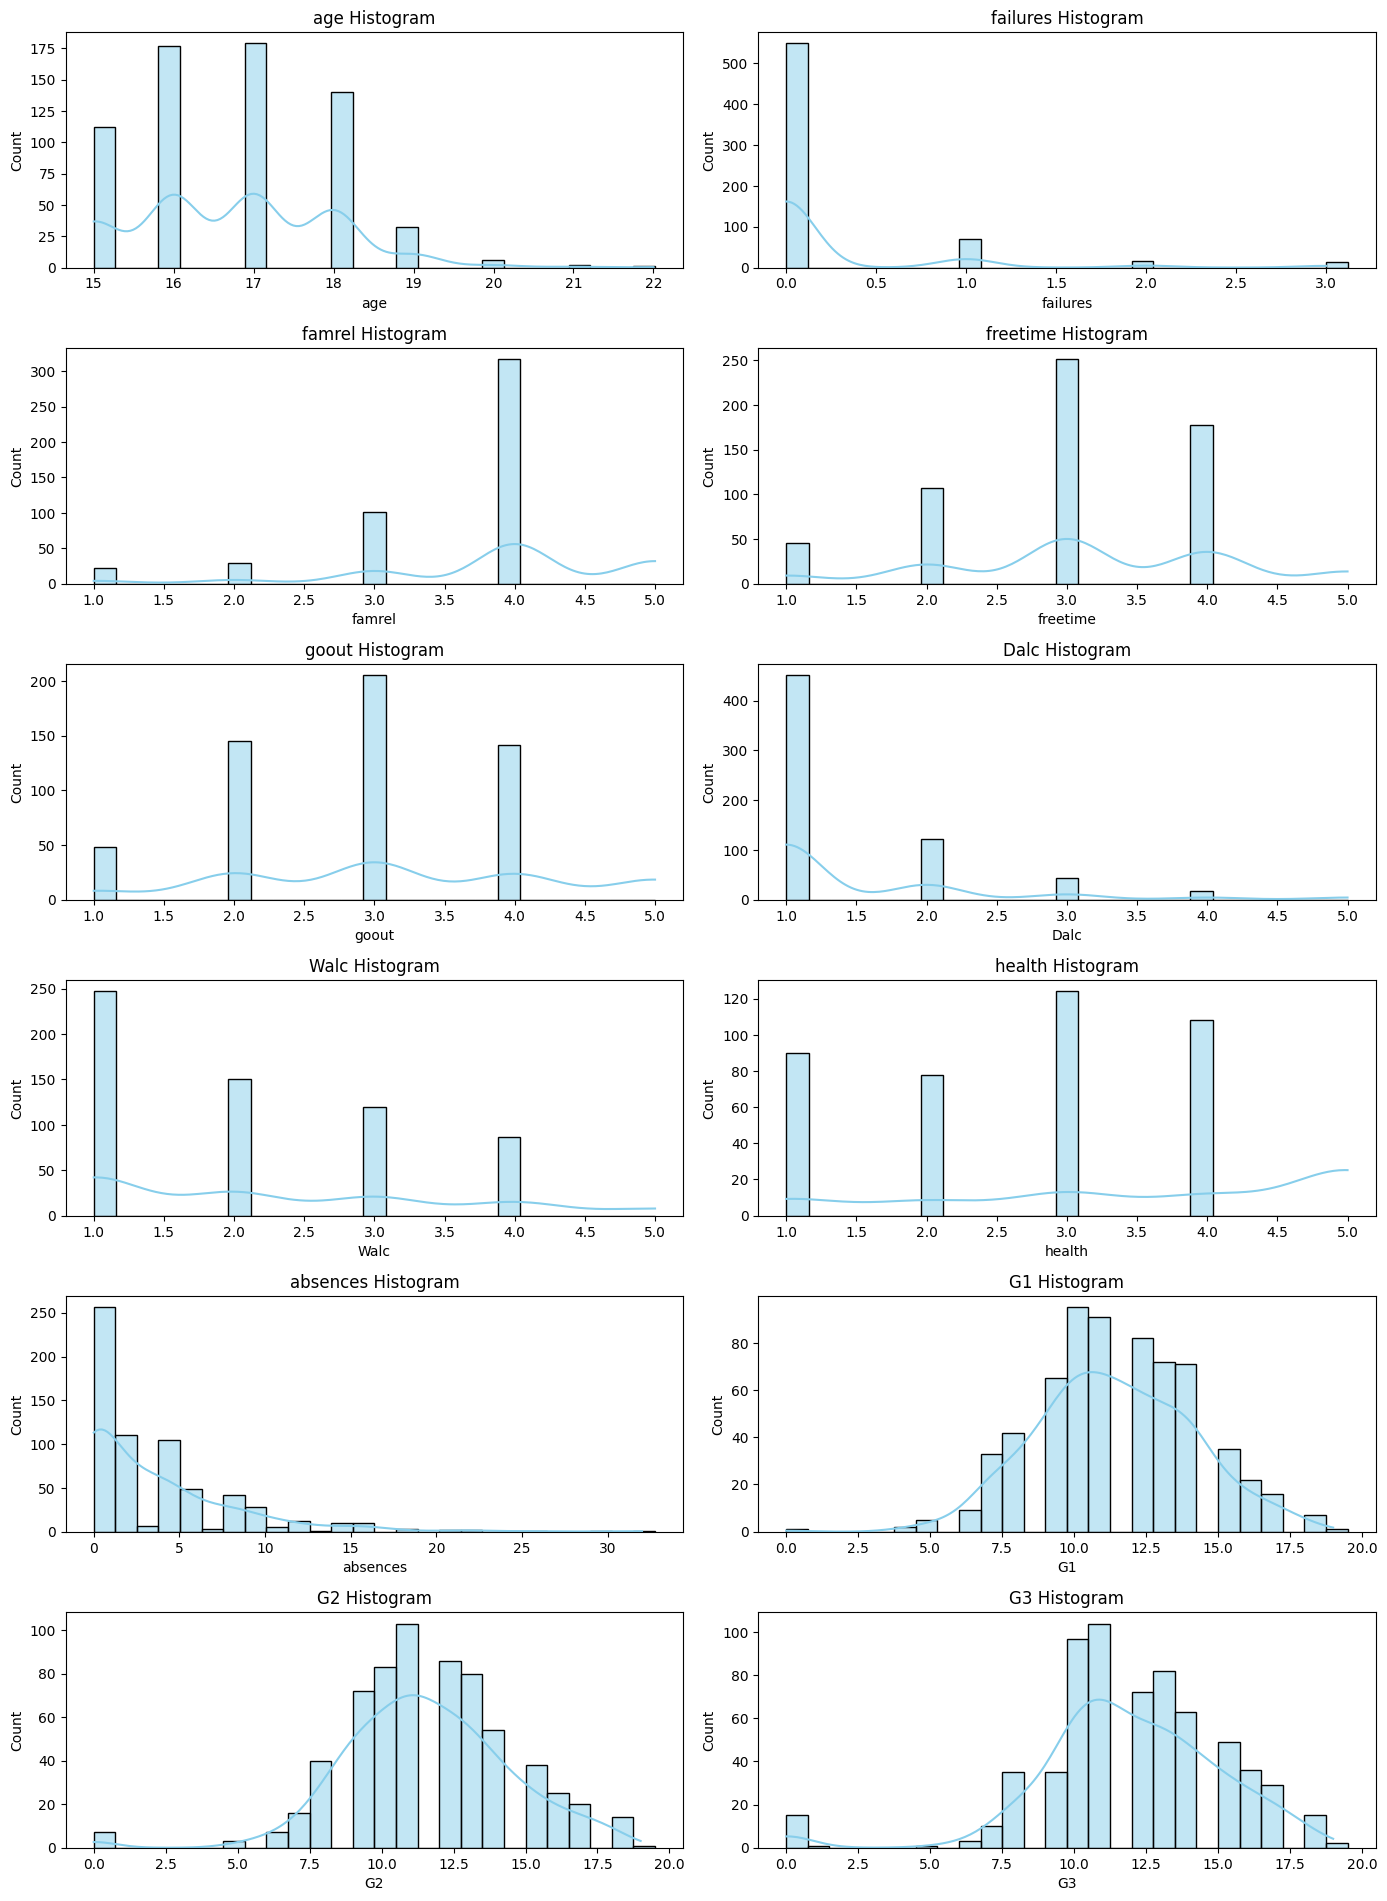

In [23]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(14, 25))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col],
                 bins= np.sqrt(len(df[col])),
                 kde=True,
                 color="skyblue",
                 ax=axes[i],
                 binwidth= round((df[col].max() - df[col].min()) / np.sqrt(len(df[col])),2)
    )
    axes[i].set_title(f"{col} Histogram", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

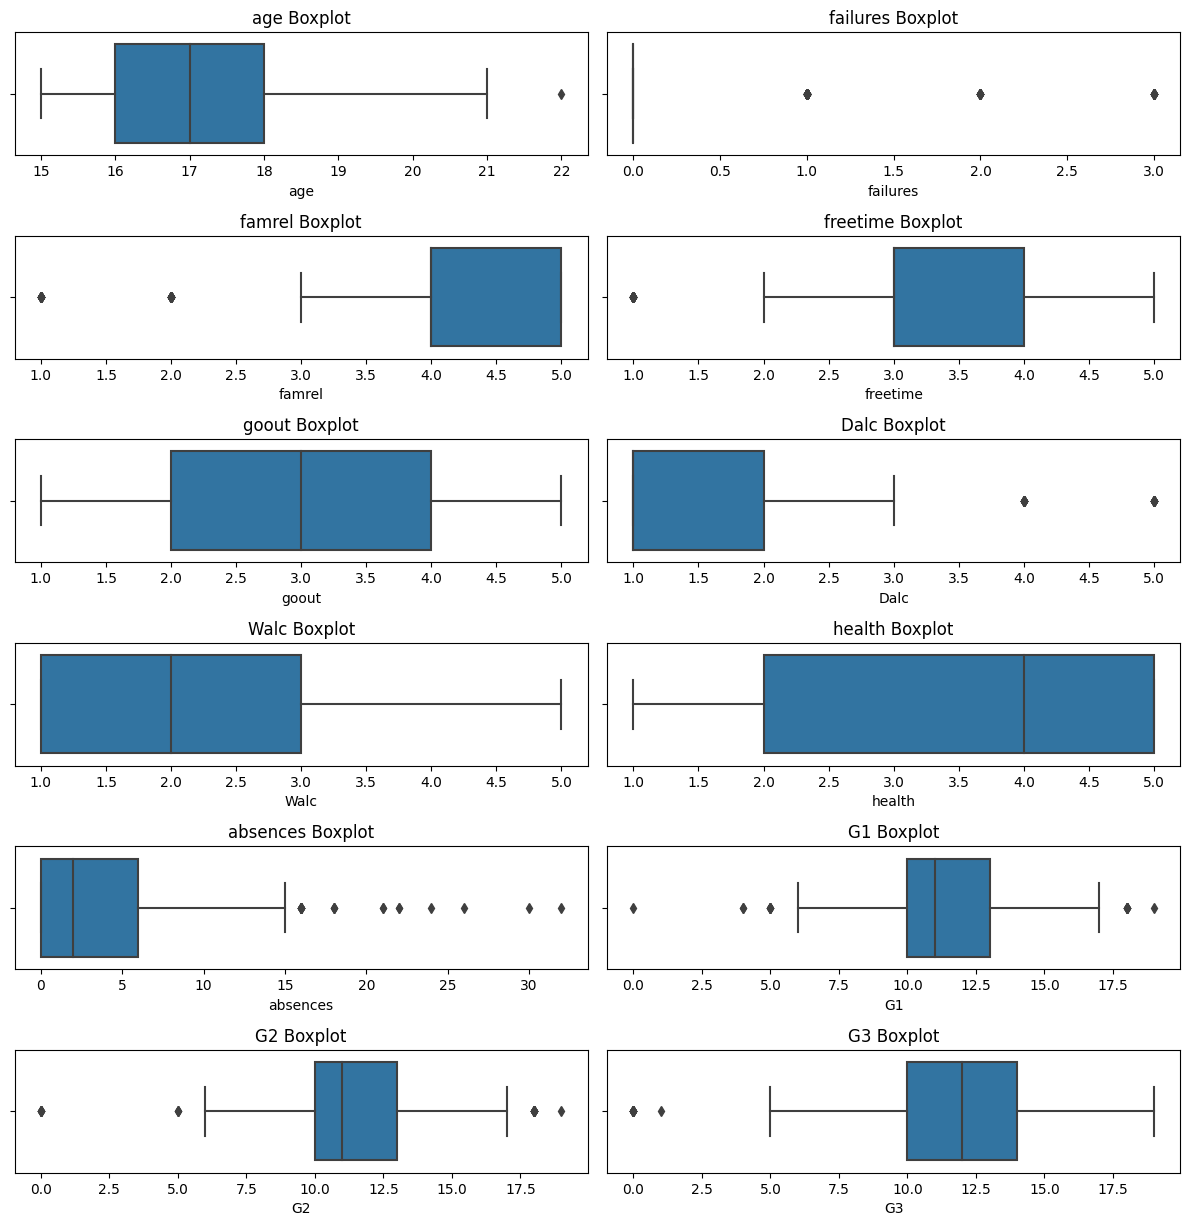

In [24]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 16))
axes = axes.flatten()


for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=df[col], ax=axes[i])
    axes[i].set_title(f"{col} Boxplot", fontsize=12)
    axes[i].set_ylabel("")
    axes[i].set_xlabel(col)


for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Bivariate analysis

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


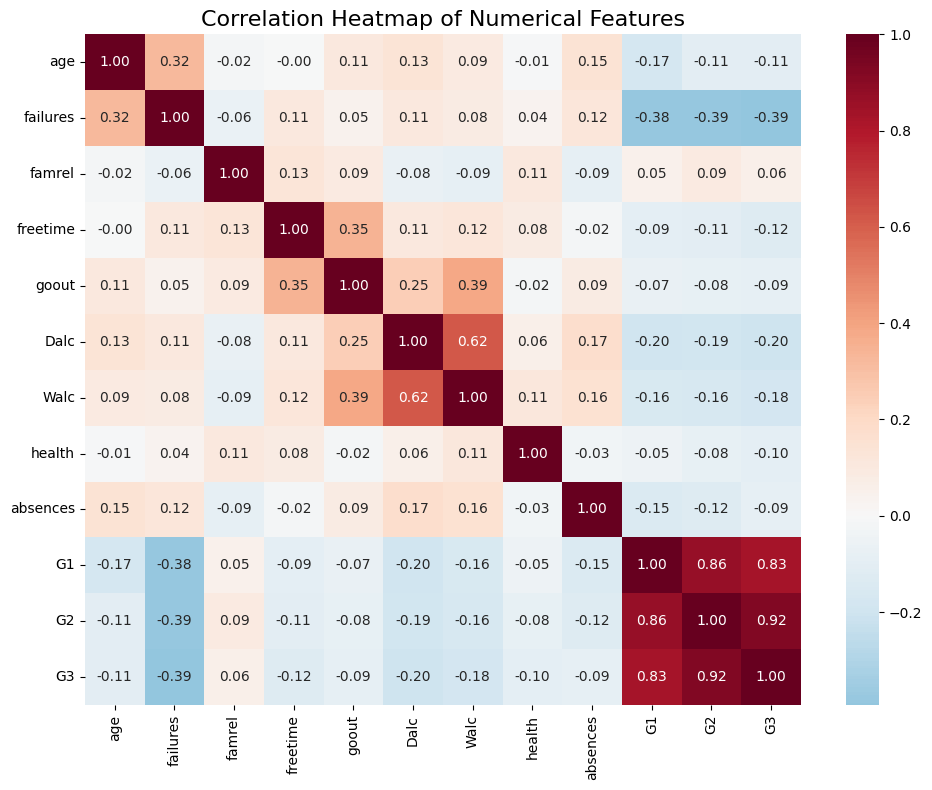

In [25]:
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0, cbar=True)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

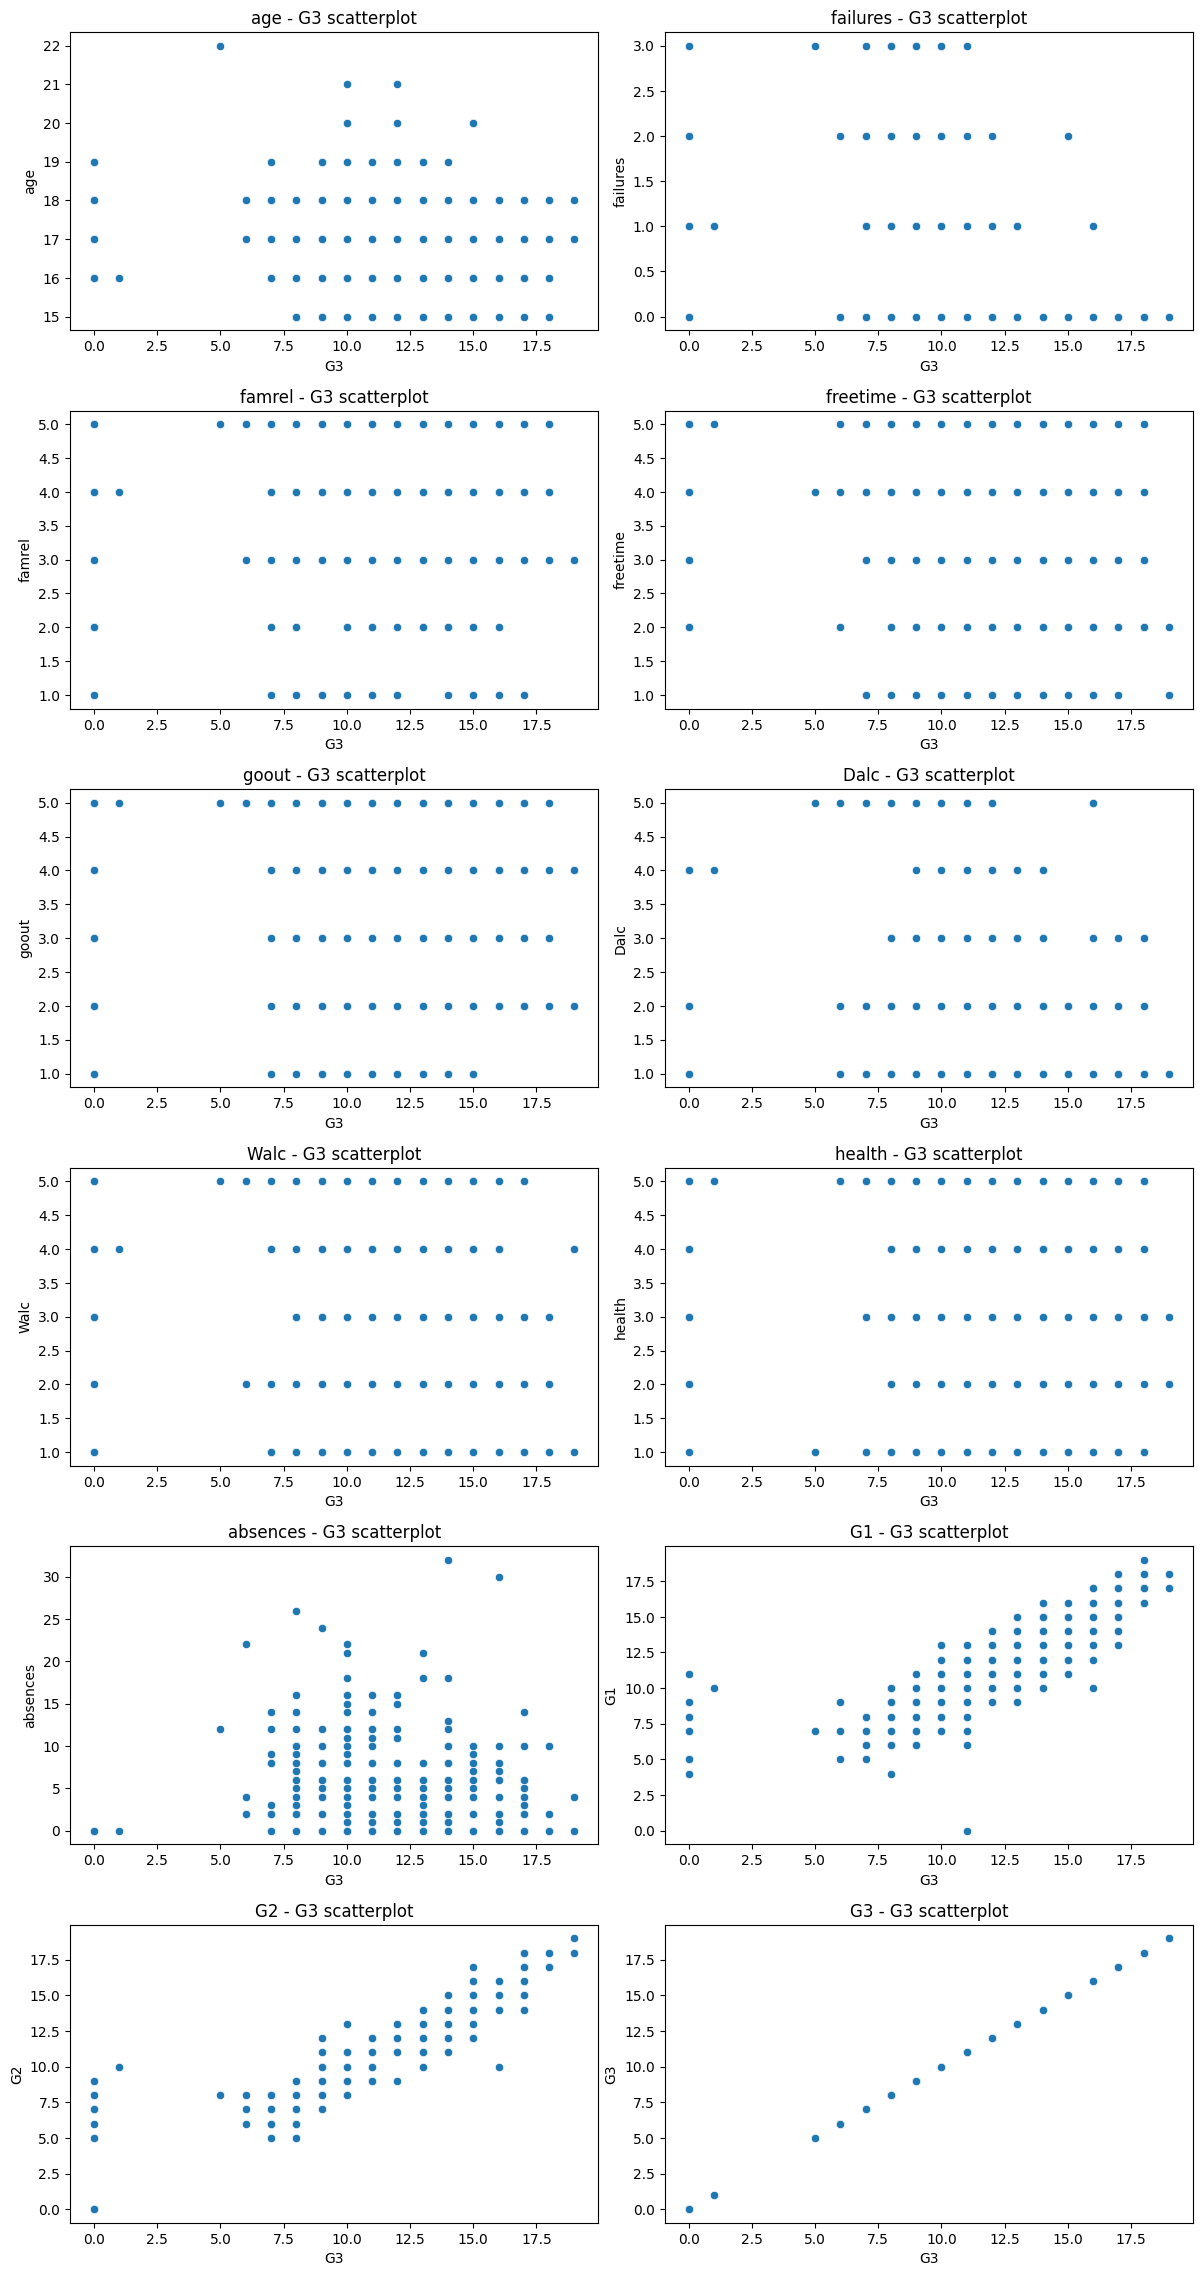

In [26]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 30))
axes = axes.flatten()


for i, col in enumerate(num_cols):
    sns.scatterplot(data = df, x = df['G3'], y = df[col], ax=axes[i])
    axes[i].set_title(f"{col} - G3 scatterplot", fontsize=12)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('G3')


for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

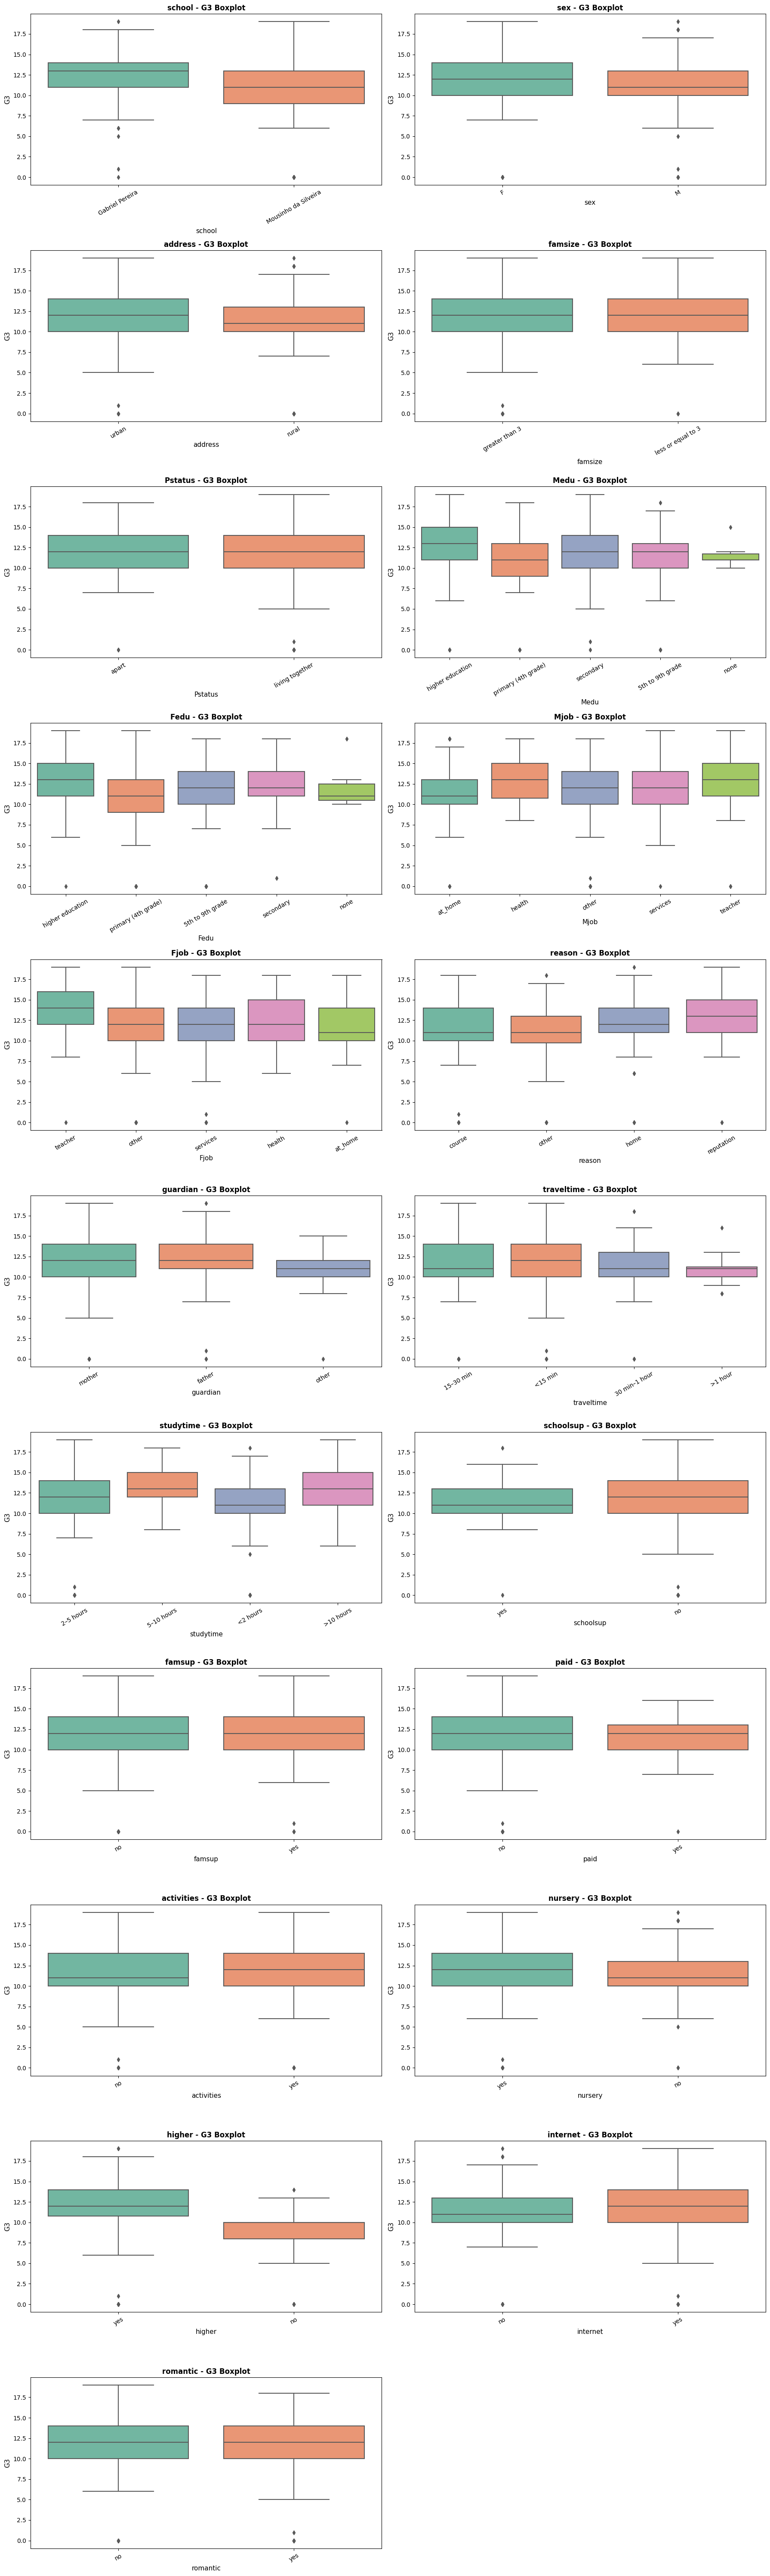

In [27]:
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(18, 60))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(
        data=df,
        x=col,
        y='G3',
        palette="Set2",
        ax=axes[i]
    )

    axes[i].set_title(f"{col} - G3 Boxplot", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('G3', fontsize=11)

    axes[i].tick_params(axis='x', rotation=30)

for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [28]:
corr["G3"]

age        -0.106505
failures   -0.393316
famrel      0.063361
freetime   -0.122705
goout      -0.087641
Dalc       -0.204719
Walc       -0.176619
health     -0.098851
absences   -0.091379
G1          0.826387
G2          0.918548
G3          1.000000
Name: G3, dtype: float64

In [29]:
corr_g3 = corr["G3"].sort_values(ascending=False)
print("Top 10 correlated features with (G3):\n", corr_g3.head(10))

Top 10 correlated features with (G3):
 G3          1.000000
G2          0.918548
G1          0.826387
famrel      0.063361
goout      -0.087641
absences   -0.091379
health     -0.098851
age        -0.106505
freetime   -0.122705
Walc       -0.176619
Name: G3, dtype: float64


# Preprocessing

## Outlier Analysis

In [15]:
def count_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return ((col < lower) | (col > upper)).sum()

outliers_df = (
    df[num_cols]
    .apply(count_outliers)
    .reset_index()
    .rename(columns={'index': 'Column', 0: 'Outliers_Count'})
    .sort_values(by="Outliers_Count", ascending=False)
    .reset_index(drop=True)
)

outliers_df['percentage %'] = [round((col / len(df)) * 100 , 2) for col in outliers_df['Outliers_Count']]
outliers_df

,Column,Outliers_Count,percentage %
0,failures,100,15.41
1,famrel,51,7.86
2,freetime,45,6.93
3,Dalc,34,5.24
4,G2,25,3.85
5,absences,21,3.24
6,G1,16,2.47
7,G3,16,2.47
8,age,1,0.15
9,goout,0,0.00


Although some variables (e.g., `failures`, `famrel`, `freetime`, `Dalc`) show observations outside the interquartile range (IQR) limits, these values are **not necessarily anomalies** but represent **naturally possible and meaningful data points** within the context of student behavior and performance.

Therefore, removing them could **distort the true distribution** and reduce the representativeness of the dataset.
Hence, **no outlier removal** was performed.

## Split Data

In [16]:
X=df.drop(columns="G3")
y=df["G3"]

## Data Encoding 

In [17]:
cat_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic'],
      dtype='object')

In [18]:
binary_cols = []
for col in cat_cols:
    if len(df[col].value_counts().index.to_list()) <= 2:
        binary_cols.append(col)

In [19]:
binary_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [20]:
for col in binary_cols:
    print(f"{col} : {df[col].value_counts().index.to_list()}")

school : ['Gabriel Pereira', 'Mousinho da Silveira']
sex : ['F', 'M']
address : ['urban', 'rural']
famsize : ['greater than 3', 'less or equal to 3']
Pstatus : ['living together', 'apart']
schoolsup : ['no', 'yes']
famsup : ['yes', 'no']
paid : ['no', 'yes']
activities : ['no', 'yes']
nursery : ['yes', 'no']
higher : ['yes', 'no']
internet : ['yes', 'no']
romantic : ['no', 'yes']


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [24]:

encoders

{'school': {'Gabriel Pereira': np.int64(0),
  'Mousinho da Silveira': np.int64(1)},
 'sex': {'F': np.int64(0), 'M': np.int64(1)},
 'address': {'rural': np.int64(0), 'urban': np.int64(1)},
 'famsize': {'greater than 3': np.int64(0), 'less or equal to 3': np.int64(1)},
 'Pstatus': {'apart': np.int64(0), 'living together': np.int64(1)},
 'schoolsup': {'no': np.int64(0), 'yes': np.int64(1)},
 'famsup': {'no': np.int64(0), 'yes': np.int64(1)},
 'paid': {'no': np.int64(0), 'yes': np.int64(1)},
 'activities': {'no': np.int64(0), 'yes': np.int64(1)},
 'nursery': {'no': np.int64(0), 'yes': np.int64(1)},
 'higher': {'no': np.int64(0), 'yes': np.int64(1)},
 'internet': {'no': np.int64(0), 'yes': np.int64(1)},
 'romantic': {'no': np.int64(0), 'yes': np.int64(1)}}

In [25]:
X.select_dtypes(include = 'object').columns.to_list()

['Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime']

In [26]:
X.shape

(649, 32)

In [29]:
import pandas as pd

In [30]:
X = pd.get_dummies(
    X,
    columns= X.select_dtypes(include = 'object').columns.to_list(),
    drop_first=False
                  )

In [31]:
X.shape

(649, 59)

In [32]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'Medu_5th to 9th grade',
       'Medu_higher education', 'Medu_none', 'Medu_primary (4th grade)',
       'Medu_secondary', 'Fedu_5th to 9th grade', 'Fedu_higher education',
       'Fedu_none', 'Fedu_primary (4th grade)', 'Fedu_secondary',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'traveltime_15–30 min',
       'traveltime_30 min–1 hour', 'traveltime_<15 min', 'traveltime_>1 hour',
       'studytime_2–5 hours', 'studytime_5–10 hours', 'studytime_<2 hours'

In [33]:
y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (519, 59)
X_test shape : (130, 59)
y_train shape : (519,)
y_test shape : (130,)


# Model Training and Evaluation

### **Objective**
To identify the most effective regression model for predicting students’ final grades (**G3**) based on academic, social, and personal attributes in the *Student Performance* dataset.

---

### **Evaluation Metric**

The performance of all models was compared using the **Coefficient of Determination (R²)** — a statistical measure representing how well the model explains the variability of the dependent variable (**G3**).

**R² Formula:**

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

Where:  
- **$SS_{\text{res}}$**: **Residual Sum of Squares**  
  Sum of squared differences between observed values ($y_i$) and predicted values ($\hat{y}_i$)
  $$
  SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

- **$SS_{\text{tot}}$**: **Total Sum of Squares**  
  Sum of squared differences between observed values ($y_i$) and the mean ($\bar{y}$)
  $$
  SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2
  $$

### Interpretation:

$$
R^2 = 1 - \frac{\text{Unexplained Variation}}{\text{Total Variation}}
$$

- **$R^2 = 1$**: Perfect fit (all variance explained)
- **$R^2 = 0$**: No explanatory power  
- **$R^2 < 0$**: Model performs worse than the mean

## Linear Regression

In [46]:
LR = LinearRegression()
LR.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_pred_LR = LR.predict(X_test)

In [48]:
r2_LR = r2_score(y_test, y_pred_LR)

mae_LR = mean_absolute_error(y_test, y_pred_LR)
mse_LR = mean_squared_error(y_test, y_pred_LR)


print("R² Score:", r2_LR)
print("MSE:", mse_LR)
print('MAE:', mae_LR)

R² Score: 0.8449007036590653
MSE: 1.5124842860456444
MAE: 0.7899909949328798


## KNN

In [49]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [50]:
y_pred_KNN = KNN.predict(X_test)

In [51]:
r2_KNN = r2_score(y_test, y_pred_KNN)

mae_KNN = mean_absolute_error(y_test, y_pred_KNN)
mse_KNN = mean_squared_error(y_test, y_pred_KNN)


print("R² Score:", r2_KNN)
print("MSE:", mse_KNN)
print('MAE:', mae_KNN)

R² Score: 0.8170823793381499
MSE: 1.7837606837606836
MAE: 0.8282051282051281


In [52]:
n_neighbors= [i for i in range(1,20)]

In [53]:
for n in n_neighbors:
    print(f"for n_neighbors : {n}")
    KNN = KNeighborsRegressor(n_neighbors=n)
    KNN.fit(X_train,y_train)
    
    y_pred_KNN = KNN.predict(X_test)
    
    r2_KNN = r2_score(y_test, y_pred_KNN)

    mae_KNN = mean_absolute_error(y_test, y_pred_KNN)
    mse_KNN = mean_squared_error(y_test, y_pred_KNN)


    print("R² Score:", r2_KNN)
    print("MSE:", mse_KNN)
    print('MAE:', mae_KNN)
    print("---------------------")
    print("")

for n_neighbors : 1
R² Score: 0.7783427586709061
MSE: 2.1615384615384614
MAE: 0.8846153846153846
---------------------

for n_neighbors : 2
R² Score: 0.8132478580616975
MSE: 1.8211538461538461
MAE: 0.8576923076923076
---------------------

for n_neighbors : 3
R² Score: 0.8170823793381499
MSE: 1.7837606837606836
MAE: 0.8282051282051281
---------------------

for n_neighbors : 4
R² Score: 0.8006761061624718
MSE: 1.94375
MAE: 0.8711538461538462
---------------------

for n_neighbors : 5
R² Score: 0.7960437853450159
MSE: 1.988923076923077
MAE: 0.8430769230769231
---------------------

for n_neighbors : 6
R² Score: 0.8074412972716412
MSE: 1.877777777777778
MAE: 0.8333333333333331
---------------------

for n_neighbors : 7
R² Score: 0.7951493648113356
MSE: 1.9976452119309258
MAE: 0.8648351648351649
---------------------

for n_neighbors : 8
R² Score: 0.7958199588602218
MSE: 1.9911057692307692
MAE: 0.8884615384615384
---------------------

for n_neighbors : 9
R² Score: 0.7915481195620027
MSE:

## Decision Tree

In [54]:
DT = DecisionTreeRegressor(ccp_alpha = 0.02, random_state=42)
DT.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.02


In [55]:
y_pred_DT = DT.predict(X_test)

In [56]:
r2_DT = r2_score(y_test, y_pred_DT)
mse_DT = mean_squared_error(y_test, y_pred_DT)
mae_DT = mean_absolute_error(y_test, y_pred_DT)


print("R² Score:", r2_DT)
print("MSE:", mse_DT)
print('MAE:', mae_DT)

R² Score: 0.8508090465526892
MSE: 1.4548678042562493
MAE: 0.7205794354807675


In [57]:
ccp_alph = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.001]

In [58]:
for ccp in ccp_alph:
    print(f"for ccp_alpha : {ccp}")
    DT = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp)
    DT.fit(X_train,y_train)
    
    y_pred_DT = DT.predict(X_test)
    
    r2_DT = r2_score(y_test, y_pred_DT)
    mse_DT = mean_squared_error(y_test, y_pred_DT)
    mae_DT = mean_absolute_error(y_test, y_pred_DT)


    print("R² Score:", r2_DT)
    print("MSE:", mse_DT)
    print('MAE:', mae_DT)
    print("---------------------")
    print("")

for ccp_alpha : 0.01
R² Score: 0.8501530014576748
MSE: 1.4612653696904947
MAE: 0.7441516238549816
---------------------

for ccp_alpha : 0.02
R² Score: 0.8508090465526892
MSE: 1.4548678042562493
MAE: 0.7205794354807675
---------------------

for ccp_alpha : 0.03
R² Score: 0.8429497680506968
MSE: 1.5315092559865662
MAE: 0.7362965681237185
---------------------

for ccp_alpha : 0.04
R² Score: 0.8429497680506968
MSE: 1.5315092559865662
MAE: 0.7362965681237185
---------------------

for ccp_alpha : 0.05
R² Score: 0.8429497680506968
MSE: 1.5315092559865662
MAE: 0.7362965681237185
---------------------

for ccp_alpha : 0.06
R² Score: 0.8507271238611419
MSE: 1.455666691076235
MAE: 0.6979515440244186
---------------------

for ccp_alpha : 0.07
R² Score: 0.8507271238611419
MSE: 1.455666691076235
MAE: 0.6979515440244186
---------------------

for ccp_alpha : 0.08
R² Score: 0.8507271238611419
MSE: 1.455666691076235
MAE: 0.6979515440244186
---------------------

for ccp_alpha : 0.09
R² Score: 0.81

## RandomForest

In [59]:
RF = RandomForestRegressor(
    n_estimators=110,
    random_state=42,
    max_depth = 5
)
RF.fit(X_train,y_train)

,n_estimators,110
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
y_pred_RF = RF.predict(X_test)

In [61]:
r2_RF = r2_score(y_test, y_pred_RF)
mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)


print("R² Score:", r2_RF)
print("MSE:", mse_RF)
print('MAE:', mae_RF)

R² Score: 0.8538165018574272
MSE: 1.4255399543129328
MAE: 0.7024923841274199


In [62]:
max_depth = [i for i in range(1,30)]

In [63]:
for maxd in max_depth:
    print(f"for max_features : {maxd}")
    RF = RandomForestRegressor(random_state=42, n_estimators=110, max_depth=maxd)
    RF.fit(X_train,y_train)
    
    y_pred_RF = RF.predict(X_test)
    
    r2_RF = r2_score(y_test, y_pred_RF)
    mse_RF = mean_squared_error(y_test, y_pred_RF)
    mae_RF = mean_absolute_error(y_test, y_pred_RF)


    print("R² Score:", r2_RF)
    print("MSE:", mse_RF)
    print('MAE:', mae_RF)
    print("---------------------")
    print("")

for max_features : 1
R² Score: 0.5399455645799849
MSE: 4.486320187867466
MAE: 1.5953258211392554
---------------------

for max_features : 2
R² Score: 0.7707988834903632
MSE: 2.2351041896600106
MAE: 0.9735512456256413
---------------------

for max_features : 3
R² Score: 0.8416472082249569
MSE: 1.544211449449361
MAE: 0.7085984972342995
---------------------

for max_features : 4
R² Score: 0.8493020908855464
MSE: 1.4695632079111485
MAE: 0.6971744343491235
---------------------

for max_features : 5
R² Score: 0.8538165018574272
MSE: 1.4255399543129328
MAE: 0.7024923841274199
---------------------

for max_features : 6
R² Score: 0.8497778104219458
MSE: 1.4649241261077897
MAE: 0.7197431888495169
---------------------

for max_features : 7
R² Score: 0.8467561065553005
MSE: 1.4943909239798963
MAE: 0.7214886213380464
---------------------

for max_features : 8
R² Score: 0.8465157720307854
MSE: 1.4967345980022748
MAE: 0.7365787370400335
---------------------

for max_features : 9
R² Score: 0.8

## Lasso

In [38]:
from sklearn.linear_model import Lasso

In [39]:
LA = Lasso(alpha = 0.7)
LA.fit(X_train,y_train)

,alpha,0.7
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [40]:
y_pred_LA = LA.predict(X_test)

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_LA = r2_score(y_test, y_pred_LA)
mse_LA = mean_squared_error(y_test, y_pred_LA)
mae_LA = mean_absolute_error(y_test, y_pred_LA)


print("R² Score:", r2_LA)
print("MSE:", mse_LA)
print('MAE:', mae_LA)



R² Score: 0.8694347846173793
MSE: 1.2732348967998475
MAE: 0.6836226646569573


In [67]:
alpha= [0.1] * 20
for i in range(19):
    alpha[i+1] = 0.1 + alpha[i]

In [68]:
for alph in alpha:
    print(f"for alpha : {alph}")
    LA = Lasso(alpha = alph)
    LA.fit(X_train,y_train)
    
    y_pred_LA = LA.predict(X_test)
    
    r2_LA = r2_score(y_test, y_pred_LA)
    mse_LA = mean_squared_error(y_test, y_pred_LA)
    mae_LA = mean_absolute_error(y_test, y_pred_LA)


    print("R² Score:", r2_LA)
    print("MSE:", mse_LA)
    print('MAE:', mae_LA)
    print("---------------------")
    print("")

for alpha : 0.1
R² Score: 0.8622781656212319
MSE: 1.3430242126010943
MAE: 0.7231590074732084
---------------------

for alpha : 0.2
R² Score: 0.8645948532182999
MSE: 1.320432533148598
MAE: 0.7151769209660161
---------------------

for alpha : 0.30000000000000004
R² Score: 0.8663272764169119
MSE: 1.3035384341649259
MAE: 0.7076797242393954
---------------------

for alpha : 0.4
R² Score: 0.8675647762292814
MSE: 1.2914706874739357
MAE: 0.7007188662485484
---------------------

for alpha : 0.5
R² Score: 0.8685595963335495
MSE: 1.281769484369569
MAE: 0.6946851857818046
---------------------

for alpha : 0.6
R² Score: 0.8691829188597975
MSE: 1.2756910201319482
MAE: 0.6888464356815407
---------------------

for alpha : 0.7
R² Score: 0.8694347846173793
MSE: 1.2732348967998477
MAE: 0.6836226646569571
---------------------

for alpha : 0.7999999999999999
R² Score: 0.8693151692969154
MSE: 1.2744013514314283
MAE: 0.678988435092458
---------------------

for alpha : 0.8999999999999999
R² Score: 0.8

## Evaluation Metric: R² Score

In [69]:
# Create R²_Score dictionary
R2_Score = {
    "Random Forest": r2_RF,
    "Decision Tree": r2_DT,
    "KNN": r2_KNN,
    "Lasso": r2_LA,
    "Linear Regression": r2_LR
}

# Convert the R²_Score results to a DataFrame
R2_Score_df = pd.DataFrame.from_dict(R2_Score, orient='index', columns=['R² Score'])

R2_Score_df = R2_Score_df.sort_values(by='R² Score', ascending=False)

print(R2_Score_df)

                   R² Score
Random Forest      0.848113
Linear Regression  0.844901
Lasso              0.839901
KNN                0.811220
Decision Tree      0.803599


## Models Compared

| **Model** | **Description** | **R² Score** | **Remarks** |
|:-----------|:----------------|:-------------:|:-------------|
| **Lasso Regression** | Adds L1 regularization, driving insignificant coefficients to zero. | **0.869435** | Achieved the best balance between bias and variance; selected as the final model. |
| **Random Forest Regressor** | Ensemble of decision trees. | 0.853817 | Good accuracy but higher computational cost and less interpretability. |
| **Decision Tree Regressor** | Non-linear tree-based approach. | 0.850809 | Captured non-linear relations but tended to overfit. |
| **Linear Regression** | Baseline model assuming linear relationships between features and G3. | 0.844901 | Captured general trends but suffered from multicollinearity and overfitting. |
| **K-Nearest Neighbors (KNN) Regressor** | Predicts based on the average of the K most similar training samples. | 0.817082 | Captured local patterns but was sensitive to noisy data and scaling. |


---

## Final Model Selection — **Lasso Regression**

After evaluating multiple models, **Lasso Regression** was selected as the optimal model because it:

- Delivered the **highest R² score** on validation data  
- Automatically **eliminated less important features** (via L1 regularization)  
- Showed **strong generalization** on unseen data  
- Provided **clear interpretability** of feature importance  

Thus, **Lasso Regression** achieved the ideal balance between model simplicity and predictive performance.

---

## Key Insights from Model Analysis

- Academic progress features **G1** and **G2** had the **strongest influence** on the final grade (**G3**).  

# Save Best Mode

In [70]:
X_train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'Medu_5th to 9th grade',
       'Medu_higher education', 'Medu_none', 'Medu_primary (4th grade)',
       'Medu_secondary', 'Fedu_5th to 9th grade', 'Fedu_higher education',
       'Fedu_none', 'Fedu_primary (4th grade)', 'Fedu_secondary',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'traveltime_15–30 min',
       'traveltime_30 min–1 hour', 'traveltime_<15 min', 'traveltime_>1 hour',
       'studytime_2–5 hours', 'studytime_5–10 hours', 'studytime_<2 hours'

In [44]:
import joblib

In [45]:
joblib.dump(LA, "Lasso_model-test.pkl")

# Save model columns (the exact columns order used to train)
model_columns = X_train.columns.tolist()
pd.Series(model_columns).to_pickle("model_columns.pkl")

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

NameError: name 'pickle' is not defined

# Deploy Model

## ⚙️ How to Run the Interactive Dashboard

>  **Note:** The interactive Dash web application cannot be displayed directly inside Kaggle Notebooks.  
> This is because Kaggle runs all code inside an isolated environment that **blocks local web server ports** (e.g., `127.0.0.1:8050`).  
> As a result, the app returns the message **“127.0.0.1 refused to connect.”**

### To Run the App Locally

You can still launch the full interactive web application on your local machine by following these steps:

1. **Download the notebook and associated files** (`app.py`, `Lasso_model.pkl`, `model_columns.pkl`, etc.).
2. Ensure all dependencies are installed:
   
   `pip install dash dash-bootstrap-components joblib scikit-learn pandas`
   
3. Run the app from your terminal or IDE:

    `python app.py`

4. Once the server starts, open the link shown in the terminal:

    `Dash is running on http://127.0.0.1:8050/`

5. The dashboard will open in your browser, allowing you to:

    - Input student features (academic, demographic, and social).

    - Generate predictions for the final grade (G3) using the trained Lasso Regression model.

In [72]:
# app.py

# Helpers
def safe_id(x: str) -> str:
    s = x.replace('.', '_DOT_')
    s = re.sub(r'[^0-9A-Za-z_\-]', '_', s)
    return s

def safe_load(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"Required file not found: {path}")
    try:
        return joblib.load(path)
    except Exception:
        with open(path, "rb") as f:
            return pickle.load(f)

def normalize_token(s: str) -> str:
    return re.sub(r'[^0-9A-Za-z]', '_', str(s)).lower()

def find_model_col_for(group: str, cat: str, model_columns: list):
    """
    Try to find a dummy column in model_columns that matches the pattern: group_cat
    Returns the column name if it exists, otherwise None
    """
    cand1 = f"{group}_{cat}"
    if cand1 in model_columns:
        return cand1
    # normalize and search flexible match
    ncat = normalize_token(cat)
    prefix = f"{group}_"
    for mc in model_columns:
        if mc.lower().startswith(prefix.lower()):
            if ncat in normalize_token(mc):
                return mc
    # last resort: exact cat as column
    if cat in model_columns:
        return cat
    return None

model = safe_load("Lasso_model.pkl")
model_columns = safe_load("model_columns.pkl")
if isinstance(model_columns, pd.Series):
    model_columns = model_columns.tolist()

# label encoders mapping: {"school": {"Gabriel Pereira":0, ...}, ...}
label_encoders = {}
if os.path.exists("label_encoders.pkl"):
    try:
        label_encoders = safe_load("label_encoders.pkl")
    except Exception:
        label_encoders = {}

# Define categorical groups & binary cols
categorical_groups = {
    "Mjob": ['at_home', 'health', 'other', 'services', 'teacher'],
    "Fjob": ['at_home', 'health', 'other', 'services', 'teacher'],
    "reason": ['course', 'home', 'other', 'reputation'],
    "guardian": ['father', 'mother', 'other'],
    "Medu": ["none", "primary (4th grade)", "5th to 9th grade", "secondary", "higher education"],
    "Fedu": ["none", "primary (4th grade)", "5th to 9th grade", "secondary", "higher education"],
    "traveltime": ['<15 min', '15–30 min', '30 min–1 hour', '>1 hour'],
    "studytime": ['<2 hours', '2–5 hours', '5–10 hours', '>10 hours']
}

binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
               'famsup', 'paid', 'activities', 'nursery', 'higher',
               'internet', 'romantic']

# Human-readable options for binary columns
binary_options_values = {
    "school": ['Gabriel Pereira', 'Mousinho da Silveira'],
    "sex": ['F', 'M'],
    "address": ['urban', 'rural'],
    "famsize": ['greater than 3', 'less or equal to 3'],
    "Pstatus": ['living together', 'apart'],
    "schoolsup": ['no', 'yes'],
    "famsup": ['yes', 'no'],
    "paid": ['no', 'yes'],
    "activities": ['no', 'yes'],
    "nursery": ['yes', 'no'],
    "higher": ['yes', 'no'],
    "internet": ['yes', 'no'],
    "romantic": ['no', 'yes']
}

# Feature descriptions
feature_descriptions = {
    "reason": "Reason for choosing this school (course / home / other / reputation).",
    "schoolsup": "Extra educational support (yes/no).",
    "famsup": "Family educational support (yes/no).",
    "paid": "Extra paid classes within the subject (yes/no).",
    "activities": "Participation in extra-curricular activities (yes/no).",
    "nursery": "Attended nursery school (yes/no).",
    "higher": "Wants to take higher education after school (yes/no).",
    "internet": "Internet access at home (yes/no).",
    "romantic": "Has a romantic relationship (yes/no).",
    "famrel": "Quality of family relationships (1 very bad → 5 excellent).",
    "freetime": "Free time after school (1 very low → 5 very high).",
    "goout": "Going out with friends (1 very low → 5 very high).",
    "Dalc": "Workday alcohol consumption (1 very low → 5 very high).",
    "Walc": "Weekend alcohol consumption (1 very low → 5 very high).",
    "health": "Current health status (1 very bad → 5 very good).",
    "absences": "Number of school absences (numeric).",
    "G1": "First period grade (numeric).",
    "G2": "Second period grade (numeric).",
    "failures": "Number of past class failures (numeric).",
    "Medu": "Mother's education level (choose one).",
    "Fedu": "Father's education level (choose one).",
    "traveltime": "Home to school travel time category.",
    "studytime": "Weekly study time category.",
    # fallback
    "default_desc": "Binary indicator or dummy (0/1) for the specified condition."
}

# Detect group -> model_columns mapping
group_to_modelcols = {}
for group, cats in categorical_groups.items():
    mapping = {}
    for cat in cats:
        mc = find_model_col_for(group, cat, model_columns)
        if mc:
            mapping[cat] = mc
    if mapping:
        group_to_modelcols[group] = mapping

# Determine numeric features
numeric_feature_names = [
    "age", "failures", "famrel", "freetime", "goout",
    "Dalc", "Walc", "health", "absences", "G1", "G2"
]
numeric_cols = [n for n in numeric_feature_names if n in model_columns]

# Remaining standalone dummy columns
covered = set()
for mapping in group_to_modelcols.values():
    covered.update(mapping.values())
covered.update(numeric_cols)
covered.update([c for c in binary_cols if c in model_columns])
remaining_cols = [c for c in model_columns if c not in covered]

# Prepare binary mapping
binary_value_to_num = {}
for col, opts in binary_options_values.items():
    if col in label_encoders:
        binary_value_to_num[col] = label_encoders[col]
    else:
        # Default: map first -> 0, second -> 1
        if len(opts) >= 2:
            binary_value_to_num[col] = {opts[0]: 0, opts[1]: 1}
        else:
            binary_value_to_num[col] = {opts[0]: 1}

# Color Scheme
COLORS = {
    "primary": "#2E86AB",        # Professional blue
    "secondary": "#A23B72",      # Complementary purple
    "accent": "#F18F01",         # Accent orange
    "success": "#28a745",        # Success green
    "light_bg": "#F8F9FA",       # Light background
    "dark_bg": "#343A40",        # Dark background
    "card_bg": "#FFFFFF",        # Card background
    "text_primary": "#212529",   # Primary text
    "text_secondary": "#6C757D", # Secondary text
    "border": "#DEE2E6"          # Border color
}

# Build Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = "Student Final Grade (G3) Predictor"

# Custom CSS for professional styling
custom_css = f"""
    .professional-header {{
        background: linear-gradient(135deg, {COLORS["primary"]} 0%, {COLORS["secondary"]} 100%);
        color: white;
        border-radius: 10px;
        box-shadow: 0 4px 6px rgba(0,0,0,0.1);
    }}
    .feature-card {{
        transition: transform 0.2s ease-in-out, box-shadow 0.2s ease-in-out;
        border: none;
        border-left: 4px solid {COLORS["primary"]};
    }}
    .feature-card:hover {{
        transform: translateY(-2px);
        box-shadow: 0 6px 12px rgba(0,0,0,0.15);
    }}
    .prediction-card {{
        background: linear-gradient(135deg, {COLORS["secondary"]} 0%, {COLORS["primary"]} 100%);
        color: white;
        border: none;
    }}
    .form-label {{
        color: {COLORS["text_primary"]};
        font-weight: 600;
    }}
    .btn-primary {{
        background-color: {COLORS["primary"]};
        border-color: {COLORS["primary"]};
        font-weight: 600;
        padding: 10px 24px;
    }}
    .btn-primary:hover {{
        background-color: #1a6a8f;
        border-color: #1a6a8f;
        transform: translateY(-1px);
    }}
"""

app.index_string = f'''
<!DOCTYPE html>
<html>
    <head>
        {{%metas%}}
        <title>{{%title%}}</title>
        {{%favicon%}}
        {{%css%}}
        <style>
            {custom_css}
        </style>
    </head>
    <body>
        {{%app_entry%}}
        <footer>
            {{%config%}}
            {{%scripts%}}
            {{%renderer%}}
        </footer>
    </body>
</html>
'''

controls = []

# Binary controls
for col in binary_cols:
    if col not in model_columns:
        continue
    opts = binary_options_values.get(col, ["No", "Yes"])
    mapping = binary_value_to_num.get(col, {opts[0]: 0, opts[1]: 1})
    options = []
    for opt in opts:
        val = mapping.get(opt, mapping.get(opts[0], 0))
        options.append({"label": str(opt), "value": val})
    desc = feature_descriptions.get(col, feature_descriptions.get("default_desc"))
    controls.append(
        dbc.Card([
            dbc.CardBody([
                dbc.Row([
                    dbc.Col(html.Label(col.replace('_',' ').title(), className="form-label"), width=4),
                    dbc.Col(
                        dcc.Dropdown(
                            id=f"bin-{safe_id(col)}",
                            options=options,
                            value=options[0]["value"],
                            clearable=False,
                            style={"width":"100%"}
                        ), width=4
                    ),
                    dbc.Col(html.Small(desc, className="text-muted"), width=4)
                ])
            ])
        ], className="mb-3 feature-card")
    )

# Grouped categorical controls (one dropdown per group)
for group, mapping in group_to_modelcols.items():
    options = [{"label": "Reference (implicit, all zeros)", "value": "_REF_"}]
    # Display values in a logical order if possible.
    for cat, mc in mapping.items():
        options.append({"label": str(cat), "value": mc})
    desc = feature_descriptions.get(group, feature_descriptions.get("default_desc"))
    controls.append(
        dbc.Card([
            dbc.CardBody([
                dbc.Row([
                    dbc.Col(html.Label(group.replace('_',' ').title(), className="form-label"), width=4),
                    dbc.Col(
                        dcc.Dropdown(
                            id=f"group-{safe_id(group)}",
                            options=options,
                            value=options[0]["value"],
                            clearable=False,
                            style={"width":"100%"}
                        ), width=4
                    ),
                    dbc.Col(html.Small(desc, className="text-muted"), width=4)
                ])
            ])
        ], className="mb-3 feature-card")
    )

# Numeric inputs
for n in numeric_cols:
    pretty = n.upper() if n in ["G1","G2"] else n.replace('_',' ').title()
    desc = feature_descriptions.get(n, feature_descriptions.get("default_desc"))
    controls.append(
        dbc.Card([
            dbc.CardBody([
                dbc.Row([
                    dbc.Col(html.Label(pretty, className="form-label"), width=4),
                    dbc.Col(
                        dbc.Input(
                            id=f"num-{safe_id(n)}", 
                            type="number", 
                            value=0, 
                            size="sm",
                            style={"border": f"1px solid {COLORS['border']}"}
                        ), width=4
                    ),
                    dbc.Col(html.Small(desc, className="text-muted"), width=4)
                ])
            ])
        ], className="mb-3 feature-card")
    )

# Remaining standalone dummy columns (0/1)
for c in remaining_cols:
    desc = feature_descriptions.get(c, feature_descriptions.get("default_desc"))
    controls.append(
        dbc.Card([
            dbc.CardBody([
                dbc.Row([
                    dbc.Col(html.Label(c.replace('_',' ').title(), className="form-label"), width=4),
                    dbc.Col(
                        dcc.Dropdown(
                            id=f"input-{safe_id(c)}",
                            options=[{"label":"0 (No)","value":0},{"label":"1 (Yes)","value":1}],
                            value=0,
                            clearable=False,
                            style={"width":"100%"}
                        ), width=4
                    ),
                    dbc.Col(html.Small(desc, className="text-muted"), width=4)
                ])
            ])
        ], className="mb-3 feature-card")
    )

# Form card
form_card = dbc.Card(
    dbc.CardBody([
        html.H4("Student Features Input", className="card-title mb-4", style={"color": COLORS["primary"]}),
        html.P("Set the values for the student's features. Each field includes a detailed description to guide your inputs.", 
               className="text-muted mb-4"),
        html.Div(controls, style={"maxHeight": "70vh", "overflowY": "auto", "paddingRight": "10px"})
    ]),
    className="shadow", 
    style={
        "borderRadius": "12px", 
        "border": "none",
        "backgroundColor": COLORS["card_bg"]
    }
)

# Prediction card
prediction_card = dbc.Card([
    dbc.CardBody([
        html.H4("Prediction Panel", className="card-title mb-3", style={"color": "white"}),
        html.P("Click Predict to compute the estimated final grade (G3) based on the input features.", 
               className="mb-4", style={"color": "rgba(255,255,255,0.9)"}),
        dbc.Button(
            "Predict Final Grade", 
            id="btn-predict", 
            color="primary", 
            className="w-100 mb-3",
            size="lg"
        ),
        html.Div(id="prediction-output", style={"marginTop": "20px"})
    ])
], className="shadow prediction-card", style={"borderRadius": "12px"})

# Layout
app.layout = html.Div(
    style={
        "backgroundColor": COLORS["light_bg"],
        "minHeight": "100vh",
        "padding": "20px 0"
    },
    children=[
        dbc.Container([
            # Header
            dbc.Row([
                dbc.Col([
                    dbc.Card([
                        dbc.CardBody([
                            html.Div([
                                html.H1("Student Final Grade Predictor", 
                                       style={
                                           "textAlign": "center", 
                                           "color": "white",
                                           "fontWeight": "700",
                                           "marginBottom": "10px"
                                       }),
                                html.P("Machine Learning-powered tool to estimate student final grades (G3) based on academic and demographic features", 
                                      style={
                                          "textAlign": "center", 
                                          "color": "rgba(255,255,255,0.9)",
                                          "fontSize": "1.1rem",
                                          "marginBottom": "0"
                                      })
                            ])
                        ])
                    ], className="professional-header mb-4")
                ])
            ]),
            
            # Main content
            dbc.Row([
                dbc.Col(form_card, width=8, className="pe-3"),
                dbc.Col(prediction_card, width=4, className="ps-3")
            ], className="g-4 align-items-stretch")
        ], fluid="lg")
    ]
)

# Build state ids
group_state_ids = [f"group-{safe_id(g)}" for g in group_to_modelcols.keys()]
num_state_ids = [f"num-{safe_id(n)}" for n in numeric_cols]
bin_state_ids = [f"bin-{safe_id(b)}" for b in binary_cols if b in model_columns]
rem_state_ids = [f"input-{safe_id(c)}" for c in remaining_cols]
all_state_ids = group_state_ids + num_state_ids + bin_state_ids + rem_state_ids

# Callback
@app.callback(
    Output("prediction-output", "children"),
    Input("btn-predict", "n_clicks"),
    [State(sid, "value") for sid in all_state_ids]
)
def predict_clicked(n_clicks, *vals):
    if not n_clicks:
        return ""
    inputs = dict(zip(all_state_ids, vals))

    # init vector
    data = {col: 0.0 for col in model_columns}

    # set group dummies
    for group in group_to_modelcols.keys():
        sel = inputs.get(f"group-{safe_id(group)}")
        if sel and sel != "_REF_":
            # sel is the model column name for the chosen category
            data[sel] = 1.0

    # numeric
    for n in numeric_cols:
        v = inputs.get(f"num-{safe_id(n)}")
        try:
            data[n] = float(v)
        except Exception:
            data[n] = 0.0

    # binary
    for b in binary_cols:
        key = f"bin-{safe_id(b)}"
        if key not in inputs:
            continue
        v = inputs.get(key)
        try:
            data[b] = float(v)
        except Exception:
            data[b] = 0.0

    # remaining standalone dummies
    for c in remaining_cols:
        v = inputs.get(f"input-{safe_id(c)}")
        try:
            data[c] = float(v)
        except Exception:
            data[c] = 0.0

    # Build DataFrame in the same order as model_columns
    df_row = pd.DataFrame([data], columns=model_columns)

    # Predict (Lasso is regression - numeric G3)
    try:
        if hasattr(model, "predict"):
            pred = model.predict(df_row)
            pred_val = float(pred[0])
            pred_val = max(0.0, min(20.0, pred_val))  # clamp to 0-20
            
            # Determine grade color based on value
            if pred_val >= 16:
                grade_color = COLORS["success"]
            elif pred_val >= 10:
                grade_color = COLORS["accent"]
            else:
                grade_color = "#dc3545"  # red for low grades
                
            # show result card
            return dbc.Card([
                dbc.CardBody([
                    html.H4("Prediction Results", className="card-title", style={"color": COLORS["text_primary"]}),
                    html.Div([
                        html.H2(f"{pred_val:.1f}", style={
                            "color": grade_color, 
                            "textAlign": "center", 
                            "fontSize": "3rem",
                            "fontWeight": "bold",
                            "margin": "10px 0"
                        }),
                        html.P("Final Grade (G3)", style={
                            "textAlign": "center", 
                            "color": COLORS["text_secondary"],
                            "fontSize": "1.1rem",
                            "fontWeight": "600"
                        })
                    ], className="mb-3"),
                    html.Hr(),
                    html.P("Sample of input features used:", className="text-muted"),
                    dbc.Table([
                        html.Thead(html.Tr([
                            html.Th("Feature", style={"color": COLORS["primary"]}), 
                            html.Th("Value", style={"color": COLORS["primary"]})
                        ])),
                        html.Tbody([html.Tr([
                            html.Td(c), 
                            html.Td(df_row.iloc[0][c])
                        ]) for c in model_columns[:8]])
                    ], bordered=True, size="sm", style={"fontSize": "0.85rem"})
                ])
            ], color="light", style={"border": f"2px solid {grade_color}"})
        else:
            return dbc.Alert("Error: Loaded model does not implement predict().", color="danger")
    except Exception as e:
        return dbc.Alert(f"Prediction error: {str(e)}", color="danger")

# Run
if __name__ == "__main__":
    app.run(debug=True)

# Conclusion

Through a systematic comparison using the **R² metric**, **Lasso Regression** emerged as the most reliable and interpretable model for predicting students’ final academic performance.  

This model was further integrated into an interactive **Dash web application**, enabling real-time grade prediction based on user-selected student attributes — bridging data-driven analysis with practical educational insights.